Exercicio 1 - Curso Python para Finanças - Visualização de dados financeiros

In [1]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 1.5 MB/s 


Importação bibliotecas

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf

Criação base de dados

In [5]:
acoes = ['ABEV3.SA', 'ODPV3.SA', 'CCRO3.SA', 'PETR4.SA', 'BBAS3.SA', 'BOVA11.SA']

acoes_df = pd.DataFrame()
for acao in acoes:
  #acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']
  acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

acoes_df  

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ABEV3.SA,ODPV3.SA,CCRO3.SA,PETR4.SA,BBAS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,16.020000,9.37,14.72,9.360000,22.650000,47.259998
2015-01-05,15.730000,9.62,14.30,8.560000,22.180000,46.320000
2015-01-06,16.330000,9.55,14.51,8.280000,22.490000,46.580002
2015-01-07,16.559999,9.69,15.60,8.670000,23.480000,48.150002
2015-01-08,16.540001,9.66,15.78,9.230000,23.559999,48.509998
...,...,...,...,...,...,...
2022-09-15,15.300000,9.33,13.55,31.059999,39.849998,106.110001
2022-09-16,15.270000,9.10,13.55,30.780001,39.400002,105.599998
2022-09-19,15.470000,9.23,13.81,31.270000,40.180000,108.220001


Renomeando colunas

In [6]:
acoes_df = acoes_df.rename(columns={'ABEV3.SA': 'ABEV', 'ODPV3.SA': 'ODPV', 'CCRO3.SA': 'CCR',
                                    'PETR4.SA': 'PETBR', 'BBAS3.SA': 'BB', 'BOVA11.SA': 'BOVA'})

Visualizando o cabeçalho da base de dados

In [7]:
acoes_df.head()

,ABEV,ODPV,CCR,PETBR,BB,BOVA
Date,,,,,,
2015-01-02,16.020000,9.37,14.72,9.36,22.650000,47.259998
2015-01-05,15.730000,9.62,14.30,8.56,22.180000,46.320000
2015-01-06,16.330000,9.55,14.51,8.28,22.490000,46.580002
2015-01-07,16.559999,9.69,15.60,8.67,23.480000,48.150002
2015-01-08,16.540001,9.66,15.78,9.23,23.559999,48.509998


Transformando base de dados em CSV

In [8]:
acoes_df.to_csv('acoes.csv')

In [10]:
acoes_df1=pd.read_csv('acoes.csv')

Análise Grafica

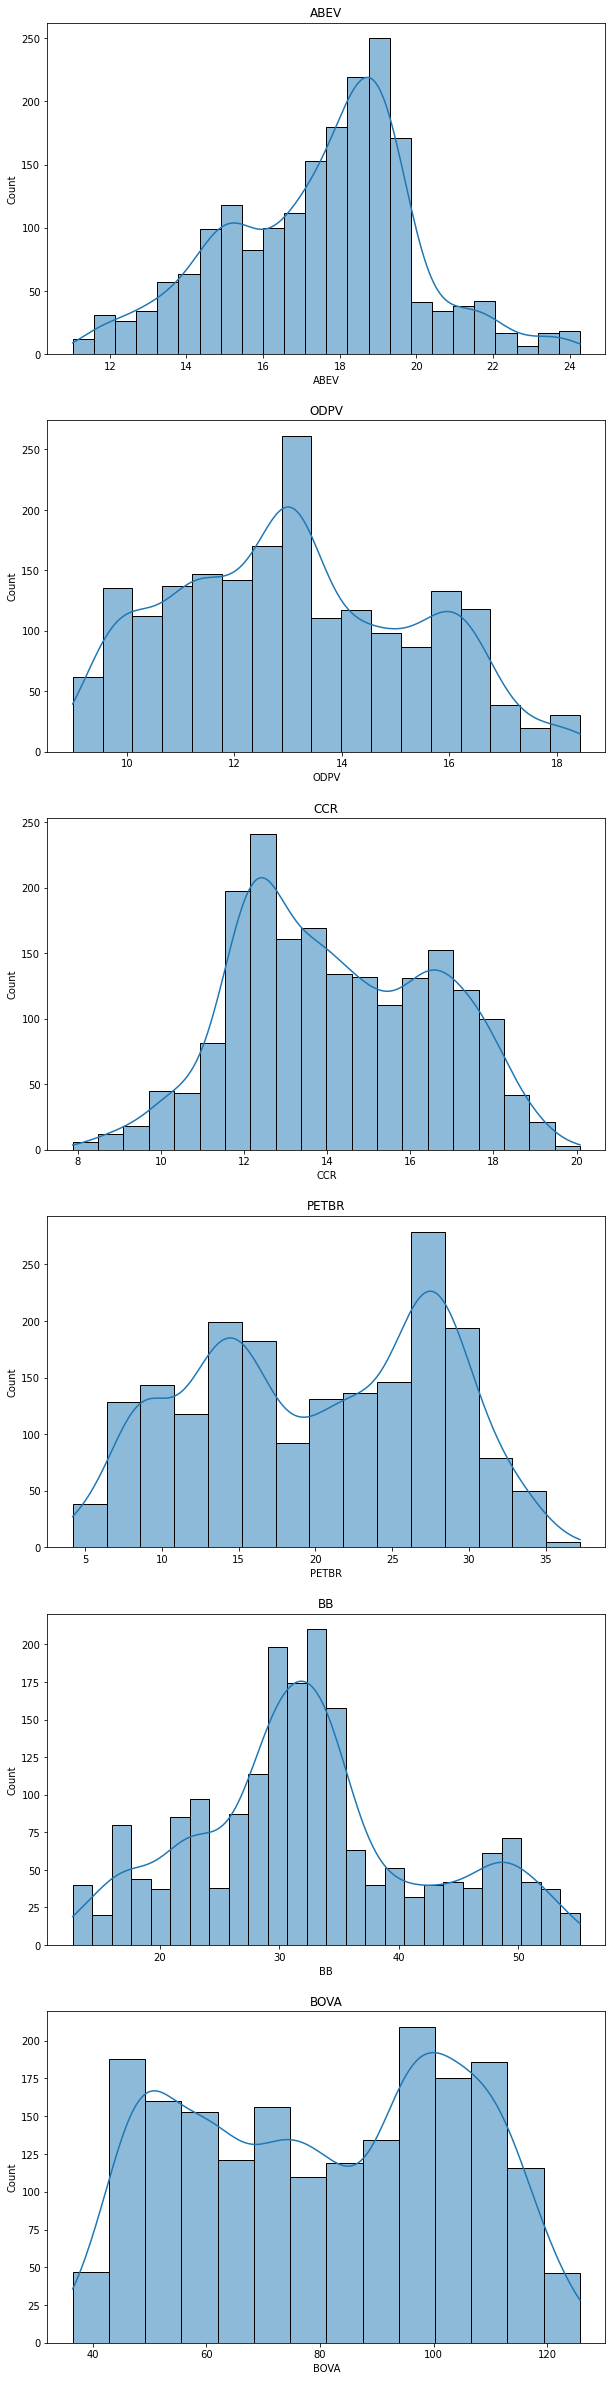

In [11]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df1.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df1[acoes_df1.columns[i]], kde = True)
  plt.title(acoes_df1.columns[i])

Analise Boxplot

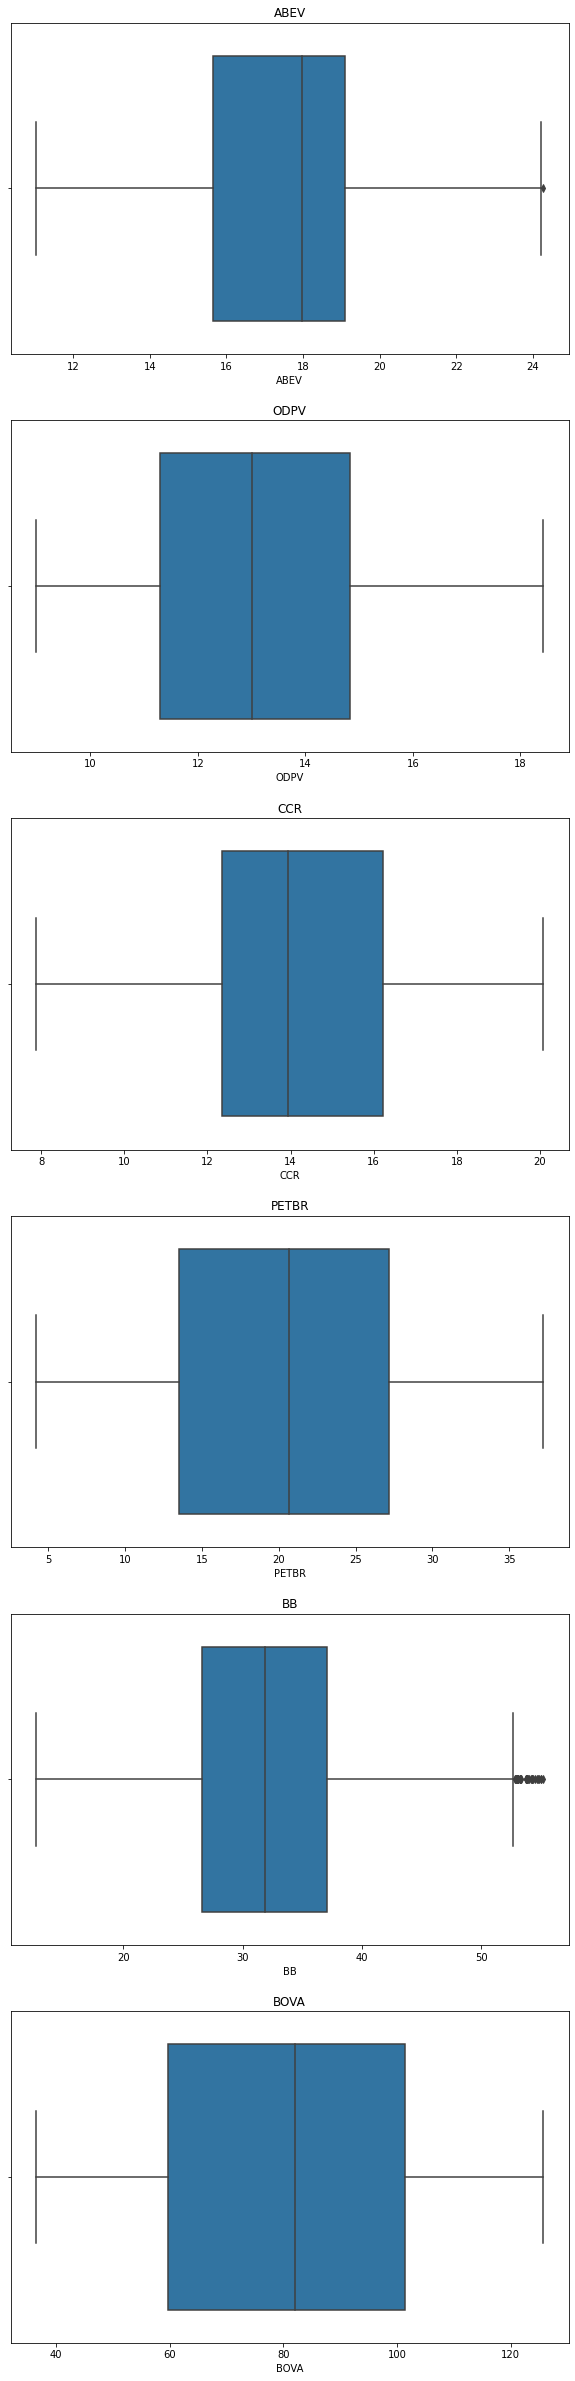

In [12]:
plt.figure(figsize=(10,50))
i = 1
for i in np.arange(1, len(acoes_df1.columns)):
  plt.subplot(7, 1, i + 1)
  sns.boxplot(x = acoes_df1[acoes_df1.columns[i]])
  plt.title(acoes_df1.columns[i])

Histórico de preço das ações

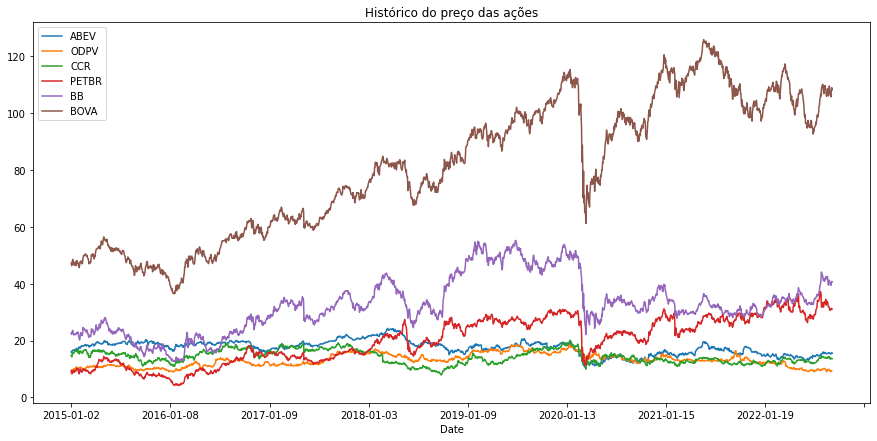

In [13]:
acoes_df1.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações');

Normalização dos valores da base de dados

In [14]:
acoes_df1_normalizado = acoes_df1.copy()
for i in acoes_df1_normalizado.columns[1:]:
  acoes_df1_normalizado[i] = acoes_df1_normalizado[i] / acoes_df1_normalizado[i][0]

Histórico de preços com valores normalizados

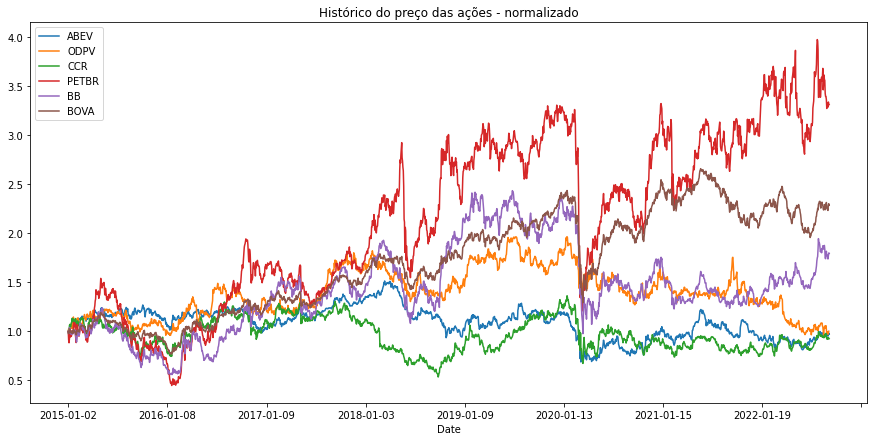

In [16]:
acoes_df1_normalizado.plot(x = 'Date', figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

Gráfico dinamico do preço das ações

In [17]:
figura = px.line(title = 'Histórico do preço das ações')
for i in acoes_df1.columns[1:]:
  figura.add_scatter(x = acoes_df1['Date'], y = acoes_df1[i], name = i)
figura.show()

Histórico de preço das ações com valores normalizados

In [18]:
figura = px.line(title = 'Histórico do preço das ações - normalizado')
for i in acoes_df1_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df1_normalizado['Date'], y = acoes_df1_normalizado[i], name = i)
figura.show()